## Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('datasets/sp500.csv')
df.head(10)

,Date,Open,High,Low,Close,Volume,Adj Close
0,02/01/2015,2058.899902,2072.360107,2046.040039,2058.199951,2708700000,2058.199951
1,05/01/2015,2054.439941,2054.439941,2017.339966,2020.579956,3799120000,2020.579956
2,06/01/2015,2022.150024,2030.250000,1992.439941,2002.609985,4460110000,2002.609985
3,07/01/2015,2005.550049,2029.609985,2005.550049,2025.900024,3805480000,2025.900024
4,08/01/2015,2030.609985,2064.080078,2030.609985,2062.139893,3934010000,2062.139893
5,09/01/2015,2063.449951,2064.429932,2038.329956,2044.810059,3364140000,2044.810059
6,12/01/2015,2046.130005,2049.300049,2022.579956,2028.260010,3456460000,2028.260010
7,13/01/2015,2031.579956,2056.929932,2008.250000,2023.030029,4107300000,2023.030029
8,14/01/2015,2018.400024,2018.400024,1988.439941,2011.270020,4378680000,2011.270020
9,15/01/2015,2013.750000,2021.349976,1991.469971,1992.670044,4276720000,1992.670044


## Extracting neccesary info about the data

In [4]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Volume     252 non-null    int64  
 6   Adj Close  252 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


(252, 7)

In [5]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [6]:
df['Date']= pd.to_datetime(df.Date)
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

## Task 1: Plot the highs of each month of the year 2015

In [7]:
df['Month']= df.Date.dt.month
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,Month
0,2015-02-01,2058.899902,2072.360107,2046.040039,2058.199951,2708700000,2058.199951,2
1,2015-05-01,2054.439941,2054.439941,2017.339966,2020.579956,3799120000,2020.579956,5
2,2015-06-01,2022.150024,2030.250000,1992.439941,2002.609985,4460110000,2002.609985,6
3,2015-07-01,2005.550049,2029.609985,2005.550049,2025.900024,3805480000,2025.900024,7
4,2015-08-01,2030.609985,2064.080078,2030.609985,2062.139893,3934010000,2062.139893,8


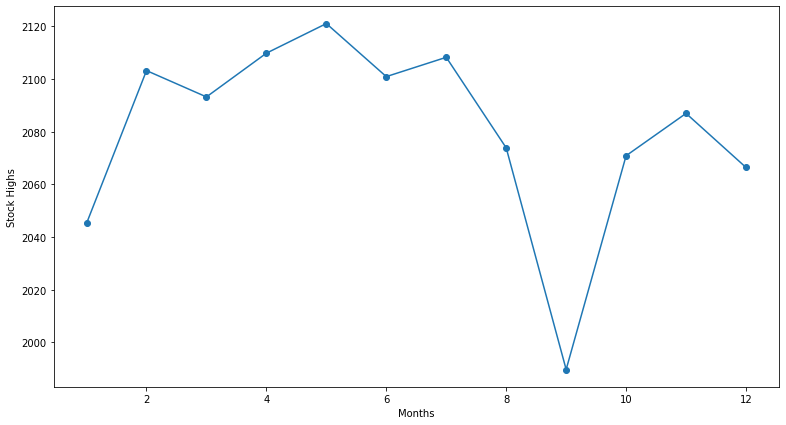

In [45]:
high= dict(df.groupby('Month')['High'].median())
fig, ax=plt.subplots(figsize=(13,7))
ax.plot(list(high.keys()), list(high.values()), marker='o')
plt.xlabel('Months')
plt.ylabel('Stock Highs')
plt.show()

## Task 2: On what date were the max volume of stocks traded and how many where open

In [90]:
d=df[df.Volume== df.Volume.max()]['Date']
d

243   2015-12-18
Name: Date, dtype: datetime64[ns]

In [93]:
df.loc[243]['Open']

2040.810059

## Task 3: Which month has lowest Adj Close and plot the graph for all dates of 4th month

In [11]:
a= df[df['Adj Close']==df['Adj Close'].min()]['Month']
a

162    8
Name: Month, dtype: int64

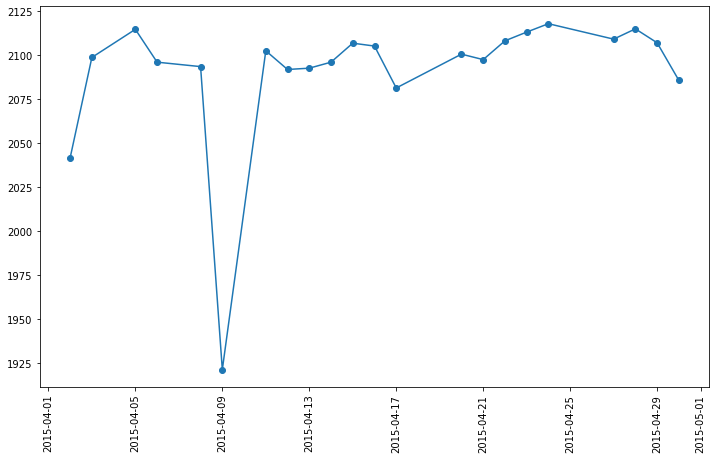

In [97]:
q=df[df.Month==4].sort_values('Date')
fig, ax= plt.subplots(figsize=(12,7))
ax.plot(q.Date, q['Adj Close'], marker='o')
plt.xticks(rotation=90)
plt.show()